In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [4]:
class MultipleSasta:
    
    def __init__(self,lr,max_iter):
        self.lr=lr
        self.max_iter=max_iter

        
    def fit(self,X,y):
        self._X=X
        self._y=y.reshape(-1,1)
        self.n_features=X.shape[1]

        self.coeff_=np.random.random(self.n_features)
        self.intercept_=np.random.random()
        
        errors=[]
        
        for i in range(self.max_iter):
            self.gradient_descend()
            errors.append(self.error())
            
        return errors
        
    def gradient_descend(self):
            d_coeff,d_intercept= self.gradient()
            
            self.coeff_-=d_coeff*self.lr
            self.intercept_-=d_intercept*self.lr
            
    def gradient(self):
            
            yp=self.hypothesis(self._X)
            d_coeff=np.dot((yp-self._y).T,self._X)/len(self._X)
            d_intercept=(yp-self._y).mean()
            
            return d_coeff.flatten(),d_intercept
            
        
    def hypothesis(self,X):
        return np.sum(self.coeff_*X,axis=1,keepdims=True)+self.intercept_
    
    def predict(self,X):
        return self.hypothesis(X).flatten()
    
    def error(self):
        ya = self._y
        yp = self.hypothesis(self._X)
        
        return ((yp-ya)**2).mean()

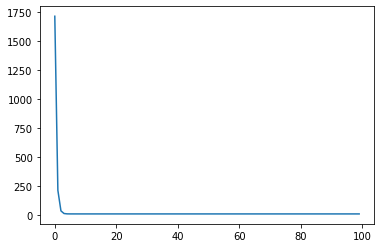

In [5]:
# X, y = make_regression(n_features=3, bias=100, noise=3, random_state=42)
# model = MultipleSasta(lr=1, max_iter=100)
# errors = model.fit(X, y)
# plt.plot(errors)


In [7]:
# print(y[:20])
# print(model.predict(X[:20]))